In [1]:
import pandas as pd
from scipy import stats
from pyranges import PyRanges
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
grch37

NameError: name 'grch37' is not defined

In [3]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']
header_4 = ['Chromosome','Start', 'End', 'Type','Strain']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
#grch37_to_t2t = PyRanges(grch37_to_t2t)
''
grch37_to_t2t_types = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13_types.bed', sep='\t', names=header_4)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep=',', names=header_3)
grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('../data/vst_results_t2tchm13.csv')
t2t_all = PyRanges(t2t_all)
#t2t_all

t2t_all_values= pd.read_csv('vst_candidates_chm13t2t.csv')
t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('vst_candidates_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)

grch37_all_values_all_cnvs = pd.read_csv('../data/vst_results_grch37.csv')
grch37_all_values_all_cnvs

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,deletion,0.00113,0.00296,0.01980,0.04847,0.00462,0.00031,...,0.03052,0.05891,0.01228,0.00365,0.01144,0.00441,0.01162,0.02469,0.03157,0.00185
1,chr1,449901,449901,deletion,0.00000,0.00000,0.01075,0.02736,0.02786,0.00508,...,0.00815,0.02250,0.02163,0.00365,0.00322,0.00636,0.00098,0.00048,0.00733,0.01248
2,chr1,665601,665601,deletion,0.00047,0.04104,0.00301,0.00687,0.00005,0.00067,...,0.06225,0.10623,0.05403,0.04467,0.00078,0.00252,0.00092,0.00684,0.00302,0.00038
3,chr1,665601,665601,duplication,-0.00000,0.01779,0.00002,0.00008,0.02189,0.02900,...,0.01653,0.02250,0.00000,0.00000,0.00002,0.02043,0.02727,0.02621,0.03179,0.00000
4,chr1,891701,891701,deletion,0.00164,0.00012,0.00004,0.00077,0.03324,0.00084,...,0.00029,0.00030,0.04514,0.00140,0.00111,0.03102,0.00054,0.05328,0.00276,0.01934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,chr9,140136301,140136301,deletion,0.01402,0.00007,0.02165,0.00041,0.03190,0.00900,...,0.01586,0.00014,0.02431,0.00589,0.01292,0.00091,0.00216,0.02050,0.00433,0.00571
7836,chr9,140197201,140197201,deletion,0.00769,0.00877,0.00001,0.00814,0.01081,0.01437,...,0.00815,0.00000,0.00000,0.00000,0.00756,0.01009,0.01352,0.00000,0.00000,0.00000
7837,chr9,140245301,140245301,deletion,0.15589,0.12055,0.28916,0.16862,0.20593,0.17624,...,0.05315,0.01008,0.01293,0.00205,0.01708,0.01357,0.02560,0.00013,0.00197,0.00365
7838,chr9,140387601,140387601,deletion,0.00062,0.02499,0.03329,0.02323,0.03069,0.01955,...,0.00000,0.00000,0.00000,0.00737,0.00000,0.00000,0.01054,0.00000,0.00676,0.00950


In [54]:
#### GRCh37 vst to T2T vst 
grch37_to_t2t = grch37_to_t2t.merge(grch37_to_t2t_types, on=['Chromosome','Start','End'])
grch37_to_t2t = PyRanges(grch37_to_t2t)
grch37_to_t2t 

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1
...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1


In [55]:
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all_values)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Type_b,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.16226,0.19753,0.23443,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.01544,0.00997,0.02872,0.01273,0.01072,0.02922,0.04083,0.00148,0.07366,0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.06592,0.00668,0.01458,0.00000,0.03668,0.01803,0.03027,0.01295,0.00208,0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.00161,0.04440,0.00331,0.03219,0.00487,0.00562,0.06277,0.00850,0.01731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.01738,0.00094,0.00142,0.00763,0.00138,0.00044,0.01009,0.01404,0.00446,0
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.00000,0.01110,0.00000,0.00763,0.00138,0.01379,0.01009,0.00000,0.01738,0
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.00877,0.00836,0.00521,0.00091,0.00097,0.00164,0.00000,0.00005,0.00009,0
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.05437,0.00094,0.04836,0.13517,0.05844,0.19557,0.05404,0.00340,0.06073,0


In [56]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Type_b,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,8360202-8360201,8360201,8360201
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.01072,0.02922,0.04083,0.00148,0.07366,0,chr1,9846202-9846201,9846201,9846201
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,16150402-16150401,16150401,16150401
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.03668,0.01803,0.03027,0.01295,0.00208,0,chr1,24377602-24377601,24377601,24377601
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.00487,0.00562,0.06277,0.00850,0.01731,0,chr1,62113302-62113301,62113301,62113301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.00138,0.00044,0.01009,0.01404,0.00446,0,chr22,37119802-37119801,37119801,37119801
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.00138,0.01379,0.01009,0.00000,0.01738,0,chr22,39293302-39293301,39293301,39293301
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.00097,0.00164,0.00000,0.00005,0.00009,0,chr22,44917502-44917501,44917501,44917501
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.05844,0.19557,0.05404,0.00340,0.06073,0,chr22,45554602-45554601,45554601,45554601


In [57]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type_x,Strain_y,Start_b,End_b,Type_b,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.20969,0.16537,0.19923,0.23576,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.00322,0.00473,0.02281,0.01140,0.01292,0.01026,0.02870,0.04041,0.00134,0.07167
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00396,0.36782,0.18162,0.13144,0.28087,0.14513,0.12031,0.03382,0.03128,0.00041
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.06462,0.32327,0.00452,0.02047,0.09120,0.04025,0.01070,0.24554,0.13059,0.00854
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.03559,0.02488,0.18592,0.07596,0.00108,0.05781,0.01040,0.08144,0.01532,0.01813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.00025,0.00014,0.03479,0.00032,0.00002,0.03548,0.00001,0.03005,0.00005,0.03625
424,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.14918,0.00423,0.00003,0.02288,0.10469,0.15221,0.25649,0.00472,0.04120,0.02441
425,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.01995,0.27350,0.10292,0.19060,0.13043,0.03126,0.09333,0.06478,0.02026,0.01602
426,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.08929,0.05556,0.00066,0.02389,0.18060,0.08708,0.21650,0.05305,0.00946,0.03372


In [58]:
## correlation
from itertools import combinations
regions = ['Africa', 'CentralAsiaSiberia', 'America','Oceania', 'WestEurasia', 'SouthAsia', 'EastAsia']
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_13037/2136663405.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


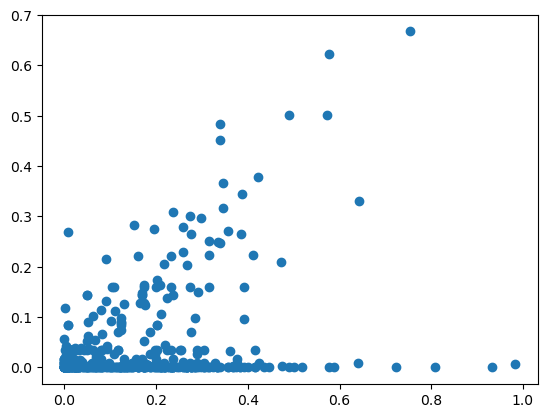

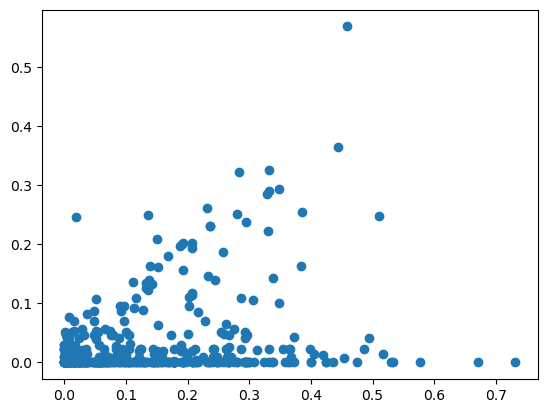

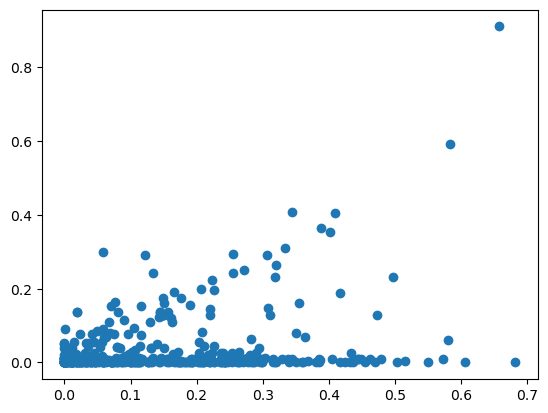

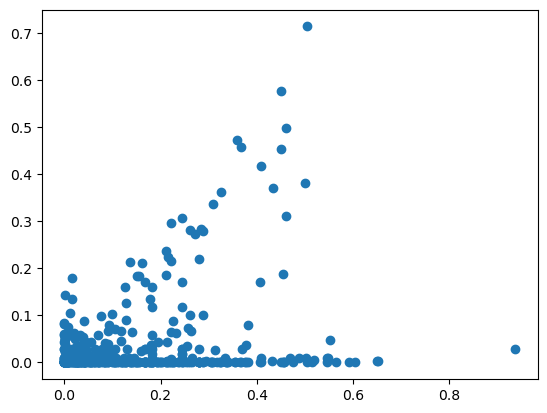

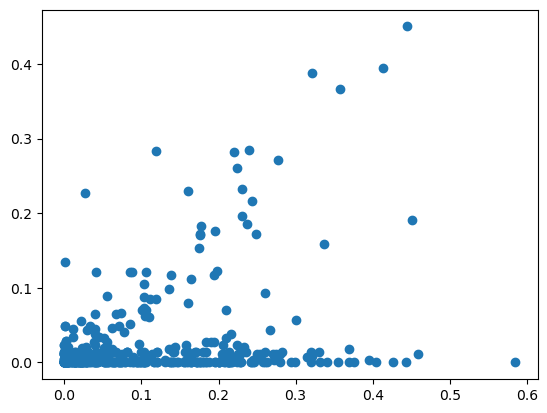

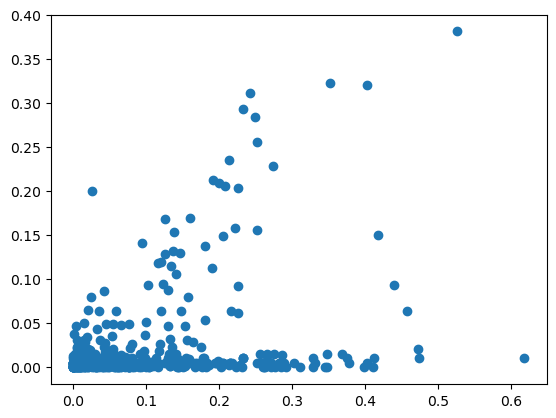

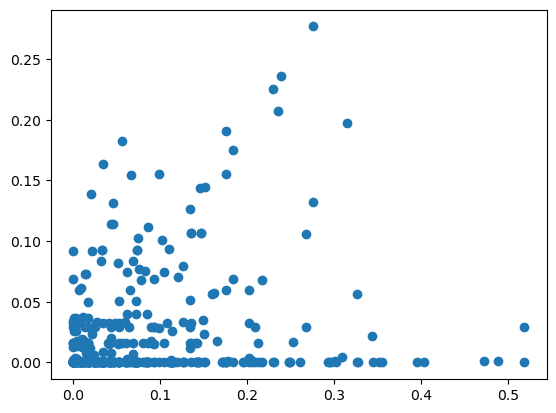

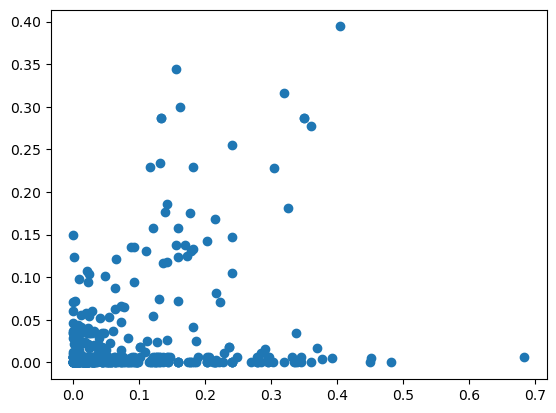

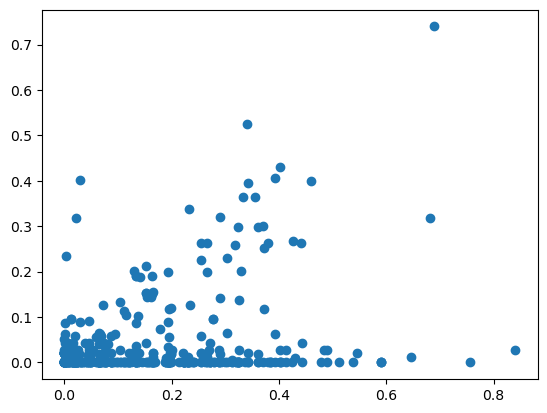

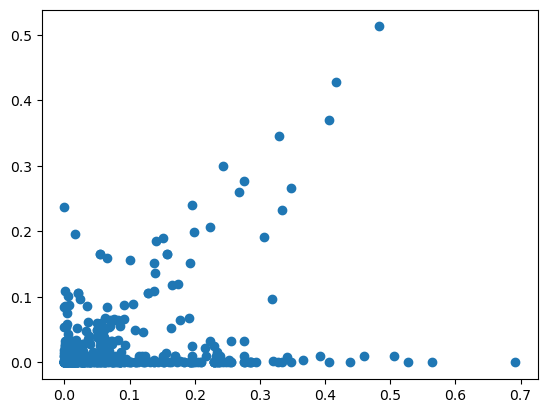

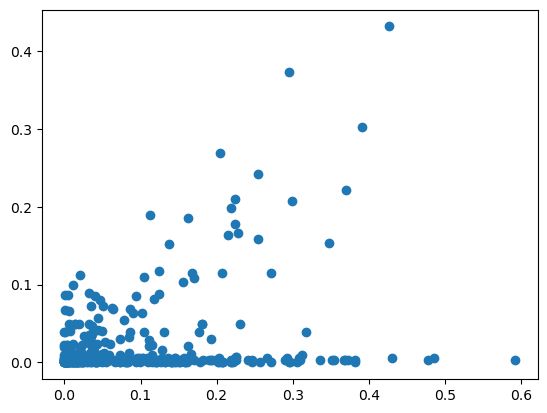

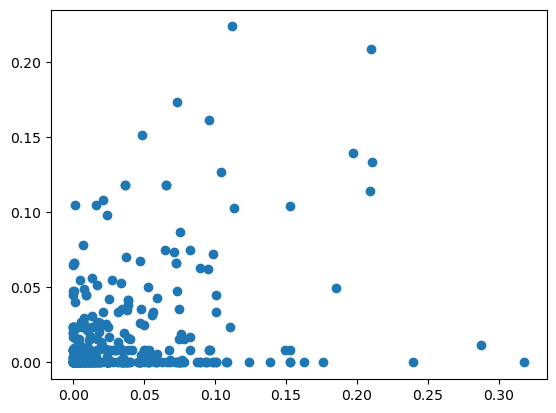

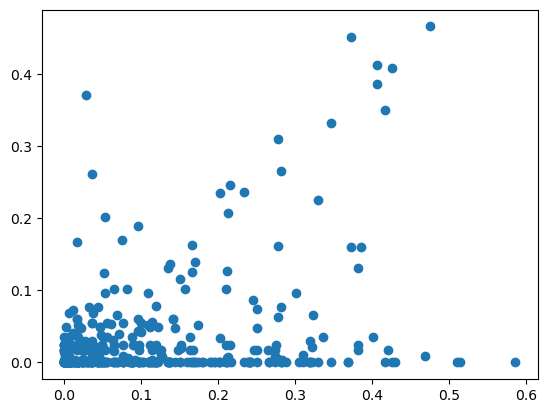

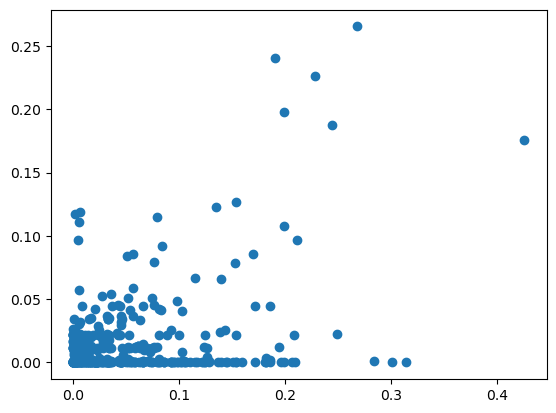

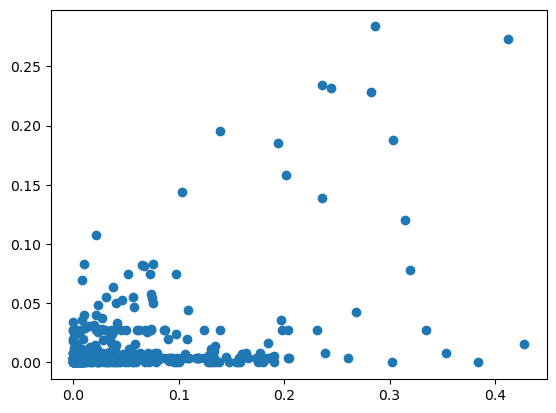

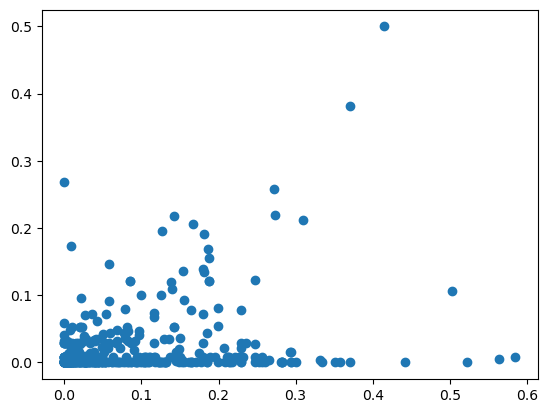

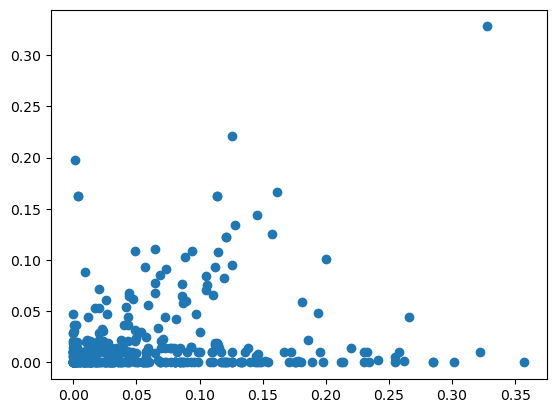

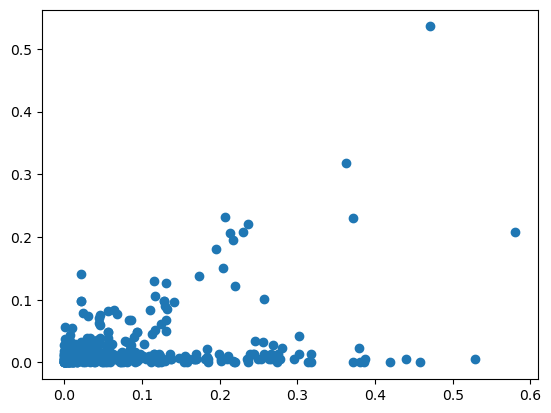

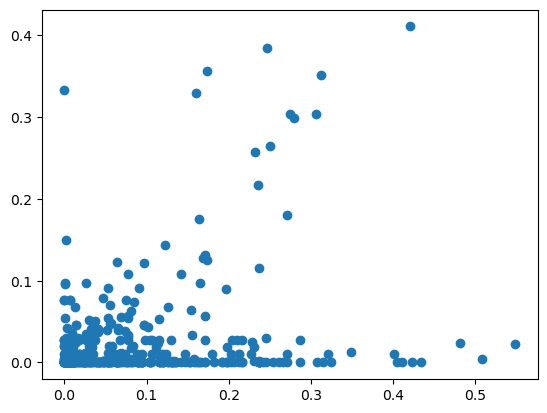

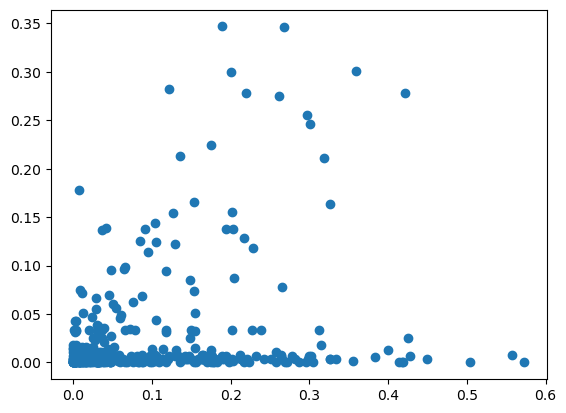

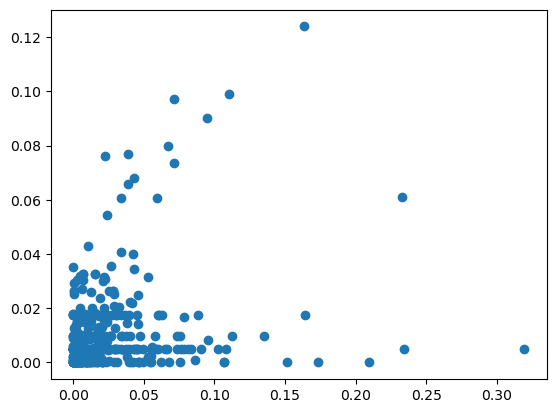

In [59]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

In [60]:
for i in range(21):
    print(combination_names[i])
    print(stats.spearmanr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
SignificanceResult(statistic=0.13271155649420846, pvalue=0.00645493881446482)
Africa-CentralAsiaSiberia
SignificanceResult(statistic=0.17623273737593836, pvalue=0.00028410487321060314)
Africa-EastAsia
SignificanceResult(statistic=0.13897957287600304, pvalue=0.004322611168211357)
Africa-Oceania
SignificanceResult(statistic=0.08390191301124948, pvalue=0.08590935223502728)
Africa-SouthAsia
SignificanceResult(statistic=0.16996633775800543, pvalue=0.0004680947636106376)
Africa-WestEurasia
SignificanceResult(statistic=0.19638749448063325, pvalue=5.072091711985226e-05)
America-CentralAsiaSiberia
SignificanceResult(statistic=0.1623280997733788, pvalue=0.0008408257244069703)
America-EastAsia
SignificanceResult(statistic=0.12383157879078674, pvalue=0.01108486569022465)
America-Oceania
SignificanceResult(statistic=0.1344963987767757, pvalue=0.0057678510050440885)
America-SouthAsia
SignificanceResult(statistic=0.1300390971115368, pvalue=0.007621228334685547)
America-WestEurasia
Sign

In [61]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
PearsonRResult(statistic=0.3401260240883692, pvalue=7.810260888072337e-13)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.2812451532035483, pvalue=4.479452956560432e-09)
Africa-EastAsia
PearsonRResult(statistic=0.3134175424339909, pvalue=5.0223487093439465e-11)
Africa-Oceania
PearsonRResult(statistic=0.30421127812763016, pvalue=1.9222211700223867e-10)
Africa-SouthAsia
PearsonRResult(statistic=0.322177582675606, pvalue=1.3405405264718919e-11)
Africa-WestEurasia
PearsonRResult(statistic=0.3322416035171913, pvalue=2.785865956558444e-12)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.2001468831097569, pvalue=3.604921308397349e-05)
America-EastAsia
PearsonRResult(statistic=0.2880766945050334, pvalue=1.8079430793199036e-09)
America-Oceania
PearsonRResult(statistic=0.30136611864852114, pvalue=2.8831576287102073e-10)
America-SouthAsia
PearsonRResult(statistic=0.29955449681412677, pvalue=3.7237631216252533e-10)
America-WestEurasia
PearsonRResult(statistic=0.328257400

In [62]:
grch37_same_type_as_t2t = []
for index,row in vst_grch37.iterrows():
    if row[5] == row[9]:
        #print(row)
        grch37_same_type_as_t2t.append(row)

        
grch37_same_type_as_t2t = pd.DataFrame(grch37_same_type_as_t2t)
#grch37_same_type_as_t2t#.iloc[5,:]

In [63]:
vst_t2t_same_type_as_grch37 = []
for index,row in vst_t2t.iterrows():
    if row[5] == row[9]:
        #print(row)
        vst_t2t_same_type_as_grch37.append(row)
    #print(row[5], row[17])
    
vst_t2t_same_type_as_grch37 = pd.DataFrame(vst_t2t_same_type_as_grch37)
#vst_t2t_same_type_as_grch37#.iloc[-1,:]

In [64]:
#### GRCh37 vst to T2T all cnvs 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
#grch37_to_t2tchm13.sort_values(by='Distance').head(417)
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance']<2000]

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Type_b,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.16226,0.19753,0.23443,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.01544,0.00997,0.02872,0.01273,0.01072,0.02922,0.04083,0.00148,0.07366,0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.06592,0.00668,0.01458,0.00000,0.03668,0.01803,0.03027,0.01295,0.00208,0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.00161,0.04440,0.00331,0.03219,0.00487,0.00562,0.06277,0.00850,0.01731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.01738,0.00094,0.00142,0.00763,0.00138,0.00044,0.01009,0.01404,0.00446,0
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.00000,0.01110,0.00000,0.00763,0.00138,0.01379,0.01009,0.00000,0.01738,0
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.00877,0.00836,0.00521,0.00091,0.00097,0.00164,0.00000,0.00005,0.00009,0
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.05437,0.00094,0.04836,0.13517,0.05844,0.19557,0.05404,0.00340,0.06073,0


In [65]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Type_b,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,8360202-8360201,8360201,8360201
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.01072,0.02922,0.04083,0.00148,0.07366,0,chr1,9846202-9846201,9846201,9846201
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,16150402-16150401,16150401,16150401
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.03668,0.01803,0.03027,0.01295,0.00208,0,chr1,24377602-24377601,24377601,24377601
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.00487,0.00562,0.06277,0.00850,0.01731,0,chr1,62113302-62113301,62113301,62113301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.00138,0.00044,0.01009,0.01404,0.00446,0,chr22,37119802-37119801,37119801,37119801
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.00138,0.01379,0.01009,0.00000,0.01738,0,chr22,39293302-39293301,39293301,39293301
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.00097,0.00164,0.00000,0.00005,0.00009,0,chr22,44917502-44917501,44917501,44917501
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.05844,0.19557,0.05404,0.00340,0.06073,0,chr22,45554602-45554601,45554601,45554601


In [66]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type_x,Strain_y,Start_b,End_b,Type_b,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,deletion,...,0.20969,0.16537,0.19923,0.23576,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,deletion,...,0.00322,0.00473,0.02281,0.01140,0.01292,0.01026,0.02870,0.04041,0.00134,0.07167
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15262571,15273032,deletion,...,0.00396,0.36782,0.18162,0.13144,0.28087,0.14513,0.12031,0.03382,0.03128,0.00041
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23884149,23889404,deletion,...,0.06462,0.32327,0.00452,0.02047,0.09120,0.04025,0.01070,0.24554,0.13059,0.00854
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,deletion,...,0.03559,0.02488,0.18592,0.07596,0.00108,0.05781,0.01040,0.08144,0.01532,0.01813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1,37182462,37185358,deletion,...,0.00025,0.00014,0.03479,0.00032,0.00002,0.03548,0.00001,0.03005,0.00005,0.03625
464,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1,39360647,39368645,deletion,...,0.14918,0.00423,0.00003,0.02288,0.10469,0.15221,0.25649,0.00472,0.04120,0.02441
465,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1,45002433,45008343,deletion,...,0.01995,0.27350,0.10292,0.19060,0.13043,0.03126,0.09333,0.06478,0.02026,0.01602
466,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1,45642081,45644771,deletion,...,0.08929,0.05556,0.00066,0.02389,0.18060,0.08708,0.21650,0.05305,0.00946,0.03372


/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_13037/2136663405.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


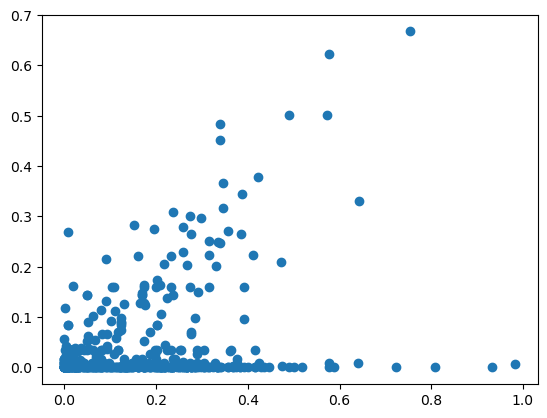

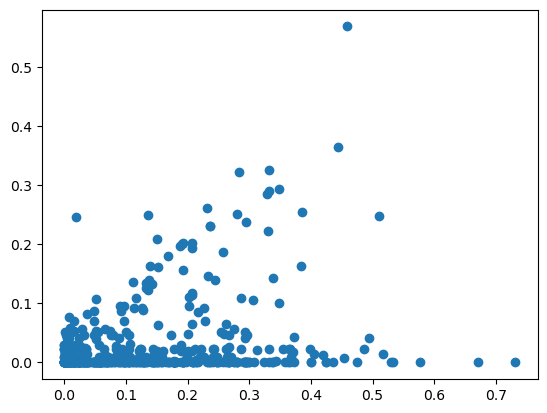

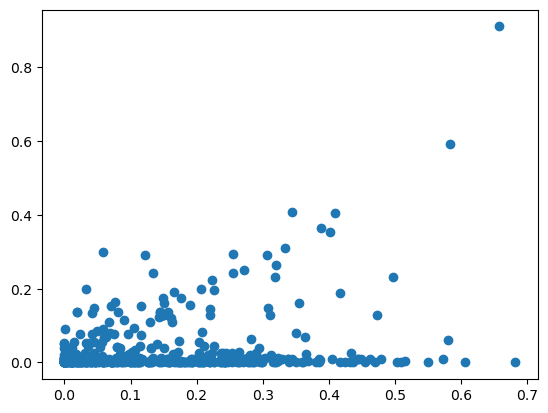

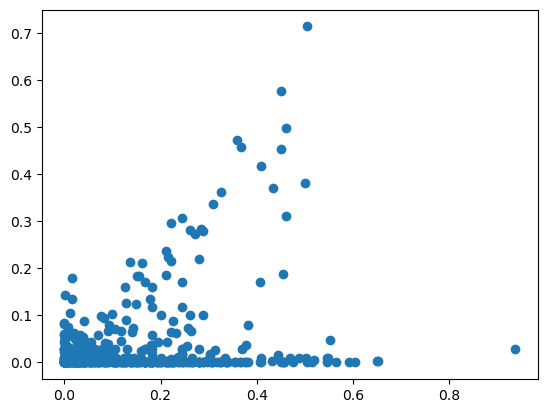

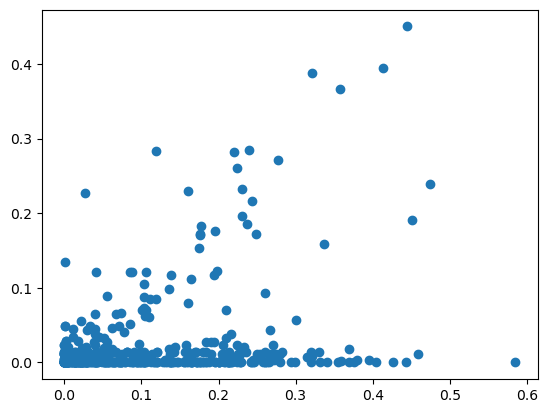

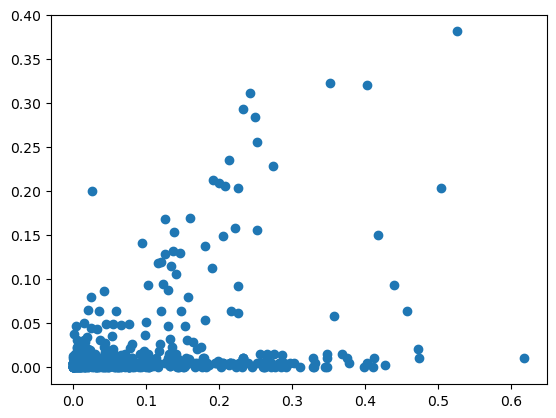

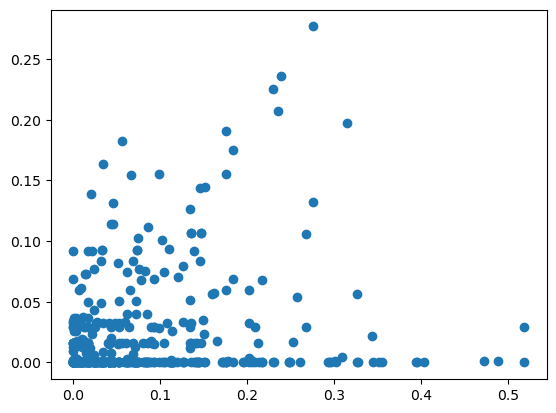

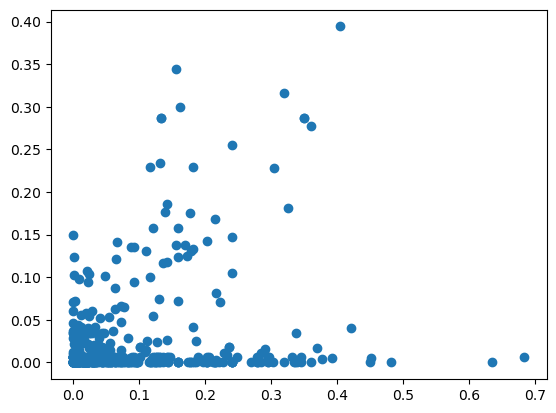

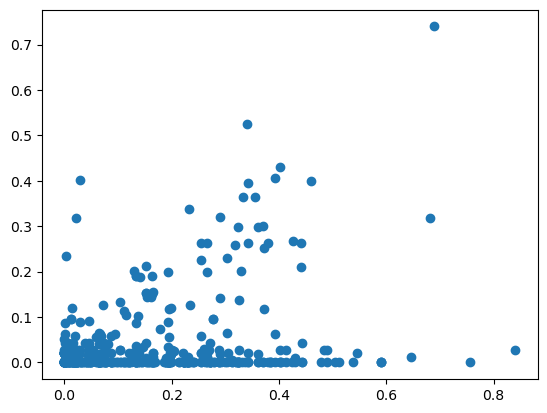

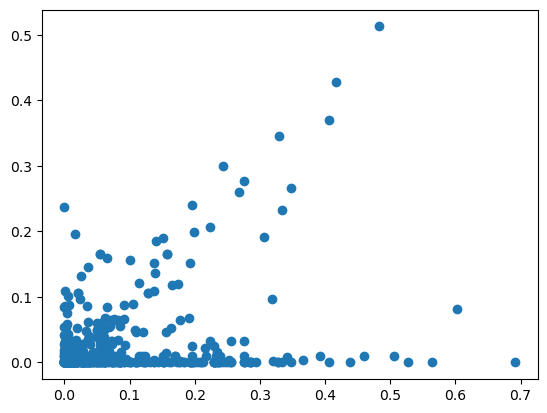

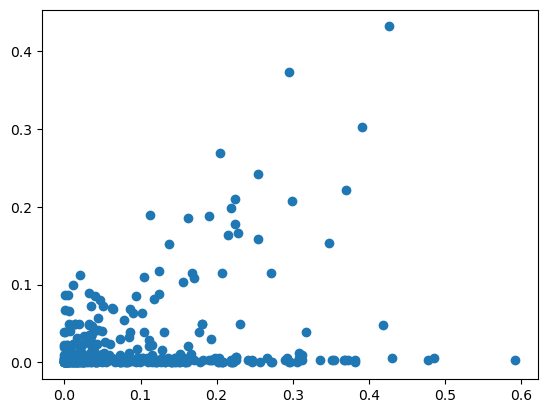

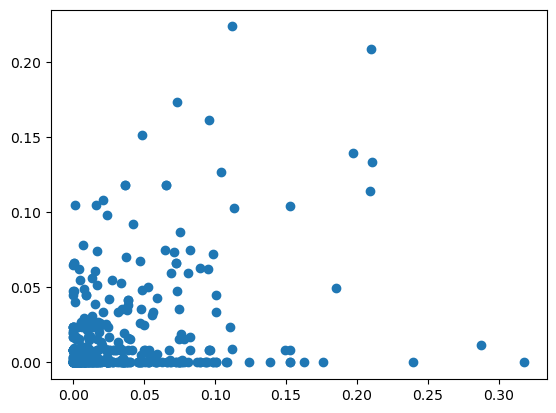

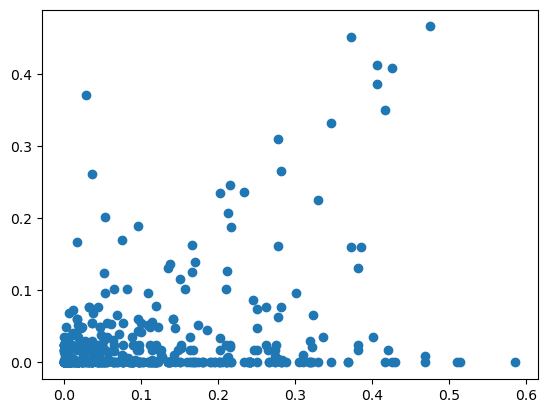

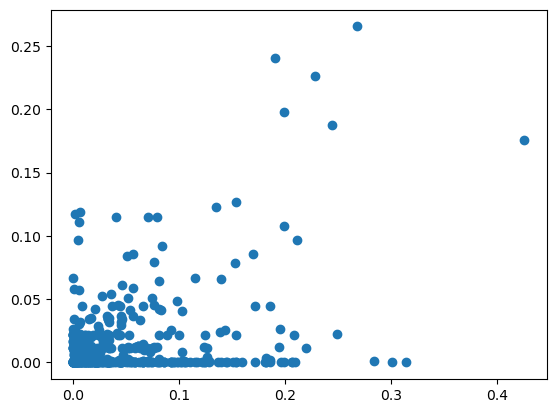

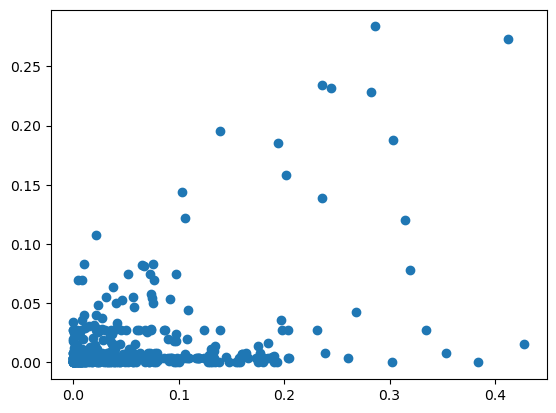

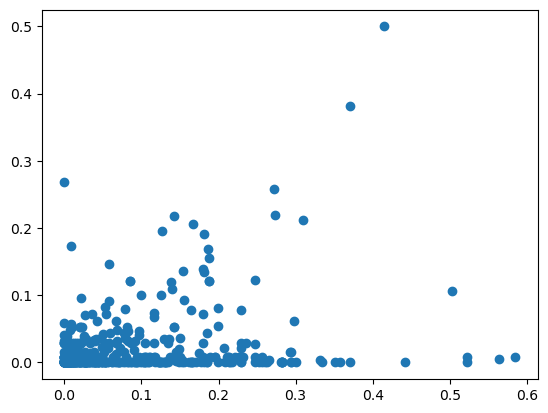

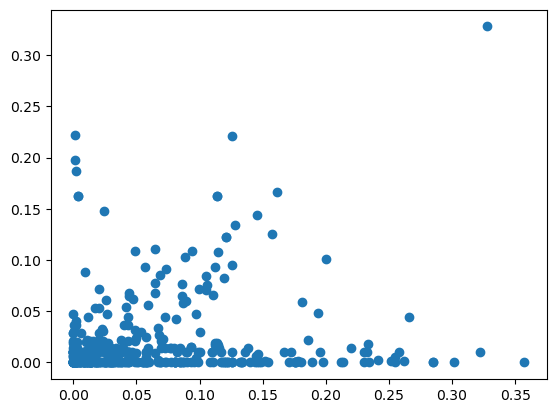

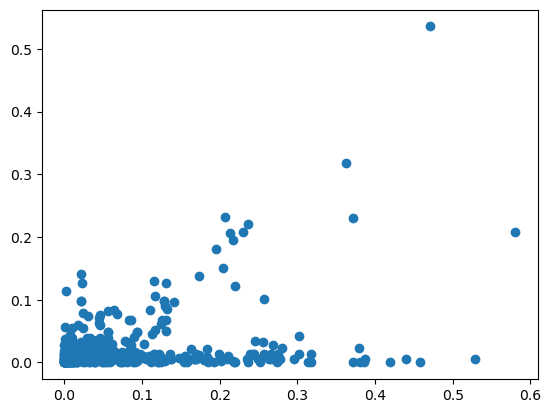

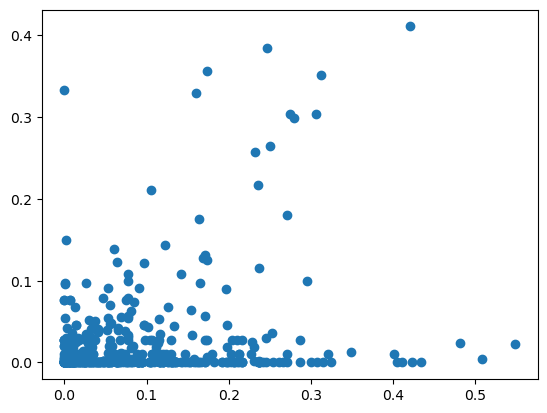

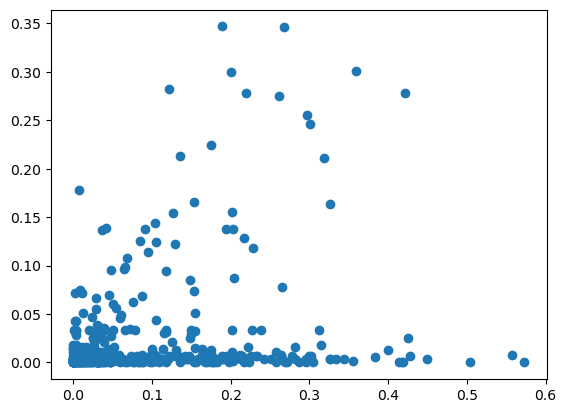

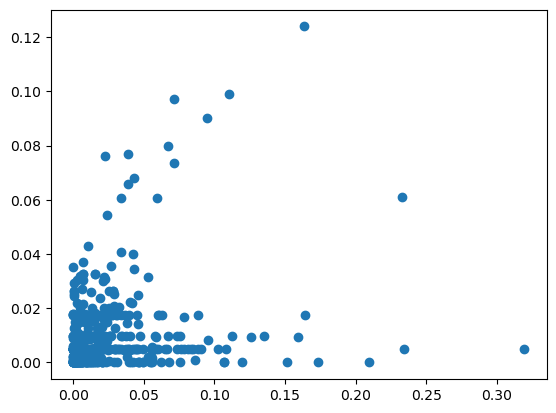

In [67]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

In [70]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))


Africa-America
PearsonRResult(statistic=0.3304644474146836, pvalue=3.4968079214602544e-13)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.27711910162553316, pvalue=1.4831592987592883e-09)
Africa-EastAsia
PearsonRResult(statistic=0.2933810166383543, pvalue=1.3903725034563806e-10)
Africa-Oceania
PearsonRResult(statistic=0.29713167634868715, pvalue=7.880514434376189e-11)
Africa-SouthAsia
PearsonRResult(statistic=0.3269532345609033, pvalue=6.390306136773553e-13)
Africa-WestEurasia
PearsonRResult(statistic=0.3309455372076211, pvalue=3.217594659673108e-13)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.19602822141711346, pvalue=2.2952365348476786e-05)
America-EastAsia
PearsonRResult(statistic=0.2693577120060099, pvalue=4.352644103726052e-09)
America-Oceania
PearsonRResult(statistic=0.294454538735619, pvalue=1.1828289669050811e-10)
America-SouthAsia
PearsonRResult(statistic=0.29348927465650765, pvalue=1.3679313456835255e-10)
America-WestEurasia
PearsonRResult(statistic=0.32216003

In [71]:
grch37_to_t2t_all

,Chromosome,Start,End,Original,Strain
0,chr1,156731,156731,chr1:665602-665601,1
1,chr1,156731,156731,chr1:665602-665601,1
2,chr1,385106,385106,chr1:891702-891701,1
3,chr1,502515,502515,chr1:1007802-1007801,1
4,chr1,542636,542636,chr1:1049402-1049401,1
...,...,...,...,...,...
7780,chr22,50867222,50867222,chr22:50797102-50797101,1
7781,chr22,51159529,51159529,chr22:51084002-51084001,1
7782,chr22,51186640,51186640,chr22:51111102-51111101,1
7783,chr22,51201464,51201464,chr22:51126602-51126601,1


In [72]:
t2t_all

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,260453,261566,duplication,0.20250,0.00826,0.08376,0.51576,0.00002,0.00647,...,0.04714,0.46687,0.01258,0.02037,0.32429,0.09181,0.11354,0.53687,0.51986,0.00809
1,chr1,261566,263205,duplication,0.24029,0.01503,0.07117,0.55574,0.00274,0.00000,...,0.02009,0.39865,0.00525,0.00772,0.24498,0.04857,0.05455,0.49563,0.39749,0.00133
2,chr1,263205,264505,duplication,0.02285,0.04029,0.05803,0.02651,0.02509,0.00032,...,0.00038,0.00269,0.00282,0.02774,0.00568,0.00630,0.04462,0.00001,0.01531,0.01705
3,chr1,264505,269912,duplication,0.00224,0.00139,0.00142,0.00294,0.00845,0.00018,...,0.00000,0.00000,0.00157,0.00022,0.00000,0.00159,0.00028,0.00333,0.00026,0.00251
4,chr1,269912,271404,duplication,0.01522,0.05149,0.04796,0.00577,0.07768,0.00970,...,0.00047,0.03834,0.00358,0.01881,0.02597,0.00676,0.01678,0.05647,0.00051,0.03922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116019,chr22,51289688,51291273,duplication,0.00456,0.00983,0.00002,0.00890,0.01188,0.01914,...,0.00167,0.00000,0.00000,0.00383,0.00151,0.00204,0.00602,0.00000,0.00340,0.00484
1116020,chr22,51291273,51292827,duplication,0.00456,0.01401,0.00777,0.00890,0.01188,0.00048,...,0.02240,0.03549,0.04468,0.01029,0.00151,0.00204,0.00361,0.00000,0.00067,0.00096
1116021,chr22,51292827,51295018,duplication,0.03417,0.04602,0.00212,0.00000,0.01383,0.00338,...,0.00660,0.03549,0.01258,0.00537,0.00151,0.00006,0.00008,0.01009,0.00226,0.00001
1116022,chr22,51295018,51296018,deletion,0.00000,0.00000,0.01072,0.00000,0.00000,0.00000,...,0.00845,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000


In [88]:
#### GRCh37 all CNVs to T2T all CNVs 


grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Africa-America,Africa-CentralAsiaSiberia,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,duplication,0.06949,0.29305,...,0.18037,0.06042,0.09813,0.02709,0.00145,0.00187,0.04083,0.01295,0.00638,0
1,chr1,502515,502515,chr1:1007802-1007801,1,502101,503101,deletion,0.00813,0.00134,...,0.01738,0.02199,0.02721,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,chr1,542636,542636,chr1:1049402-1049401,1,540598,544980,deletion,0.06195,0.00624,...,0.08309,0.02049,0.04922,0.00026,0.02701,0.00367,0.02013,0.00151,0.00961,0
3,chr1,578336,578336,chr1:1085102-1085101,1,576150,578407,deletion,0.00813,0.00134,...,0.00027,0.01592,0.02721,0.00000,0.01369,0.02783,0.01192,0.03330,0.07150,0
4,chr1,730467,730467,chr1:1234302-1234301,1,729845,731135,deletion,0.01654,0.01996,...,0.00000,0.02256,0.01172,0.00000,0.02924,0.01645,0.02052,0.01042,0.00063,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,chr22,50867222,50867222,chr22:50797102-50797101,1,50855753,50870216,deletion,0.00000,0.02266,...,0.01738,0.00094,0.02721,0.01390,0.00578,0.02500,0.01009,0.00000,0.01738,0
7778,chr22,51159529,51159529,chr22:51084002-51084001,1,51153132,51170297,deletion,0.00000,0.02266,...,0.01738,0.02199,0.00058,0.00763,0.01030,0.00131,0.00000,0.00687,0.00977,0
7779,chr22,51186640,51186640,chr22:51111102-51111101,1,51186380,51187482,deletion,0.01455,0.02797,...,0.00877,0.00193,0.00119,0.00063,0.00838,0.00829,0.01890,0.01507,0.00004,0
7780,chr22,51201464,51201464,chr22:51126602-51126601,1,51200518,51202141,deletion,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000,0


In [89]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Africa-America,Africa-CentralAsiaSiberia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,duplication,0.06949,0.29305,...,0.00145,0.00187,0.04083,0.01295,0.00638,0,chr1,891702-891701,891701,891701
1,chr1,502515,502515,chr1:1007802-1007801,1,502101,503101,deletion,0.00813,0.00134,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,1007802-1007801,1007801,1007801
2,chr1,542636,542636,chr1:1049402-1049401,1,540598,544980,deletion,0.06195,0.00624,...,0.02701,0.00367,0.02013,0.00151,0.00961,0,chr1,1049402-1049401,1049401,1049401
3,chr1,578336,578336,chr1:1085102-1085101,1,576150,578407,deletion,0.00813,0.00134,...,0.01369,0.02783,0.01192,0.03330,0.07150,0,chr1,1085102-1085101,1085101,1085101
4,chr1,730467,730467,chr1:1234302-1234301,1,729845,731135,deletion,0.01654,0.01996,...,0.02924,0.01645,0.02052,0.01042,0.00063,0,chr1,1234302-1234301,1234301,1234301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,chr22,51201464,51201464,chr22:51126602-51126601,1,51200518,51202141,deletion,0.00000,0.00000,...,0.01030,0.01379,0.00000,0.00000,0.00000,0,chr22,51126602-51126601,51126601,51126601
7781,chr22,51245253,51245253,chr22:51170102-51170101,1,51243861,51245263,deletion,0.00211,0.00565,...,0.01030,0.00131,0.05601,0.01593,0.00977,0,chr22,51170102-51170101,51170101,51170101
7782,chr22,16133265,16133265,chr22:16418702-16418701,1,16488290,16489648,duplication,0.00141,0.06241,...,0.03250,0.01143,0.15982,0.07255,0.01195,355026,chr22,16418702-16418701,16418701,16418701
7783,chr22,20757792,20757792,chr22:20708602-20708601,1,20768461,20770761,deletion,0.00000,0.00000,...,0.01030,0.01379,0.00000,0.00000,0.00000,10670,chr22,20708602-20708601,20708601,20708601


In [90]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values_all_cnvs, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain,Start_b,End_b,Type_x,Africa-America_x,Africa-CentralAsiaSiberia_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,duplication,0.06949,0.29305,...,0.00029,0.00030,0.04514,0.00140,0.00111,0.03102,0.00054,0.05328,0.00276,0.01934
1,chr1,502515,502515,chr1:1007802-1007801,1,502101,503101,deletion,0.00813,0.00134,...,0.01799,0.01206,0.01538,0.01417,0.00125,0.00022,0.00000,0.00047,0.00094,0.00017
2,chr1,542636,542636,chr1:1049402-1049401,1,540598,544980,deletion,0.06195,0.00624,...,0.00910,0.02667,0.00107,0.00327,0.00362,0.01686,0.00128,0.03915,0.00814,0.00790
3,chr1,578336,578336,chr1:1085102-1085101,1,576150,578407,deletion,0.00813,0.00134,...,0.00000,0.00000,0.00000,0.00365,0.00000,0.00000,0.00522,0.00000,0.00334,0.00471
4,chr1,730467,730467,chr1:1234302-1234301,1,729845,731135,deletion,0.01654,0.01996,...,0.00000,0.02250,0.00000,0.00000,0.02778,0.00000,0.00000,0.02621,0.03179,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,chr22,51201464,51201464,chr22:51126602-51126601,1,51200518,51202141,deletion,0.00000,0.00000,...,0.00815,0.04592,0.00000,0.00365,0.02084,0.01009,0.00098,0.05328,0.03038,0.00471
7938,chr22,51245253,51245253,chr22:51170102-51170101,1,51243861,51245263,deletion,0.00211,0.00565,...,0.00205,0.00965,0.02222,0.00121,0.02084,0.01009,0.00618,0.05328,0.00276,0.01934
7939,chr22,16133265,16133265,chr22:16418702-16418701,1,16488290,16489648,duplication,0.00141,0.06241,...,0.01315,0.04313,0.01741,0.00084,0.00689,0.06002,0.02122,0.10171,0.04101,0.00938
7940,chr22,20757792,20757792,chr22:20708602-20708601,1,20768461,20770761,deletion,0.00000,0.00000,...,0.00071,0.00585,0.03571,0.08621,0.00966,0.04598,0.11097,0.01259,0.04691,0.01377


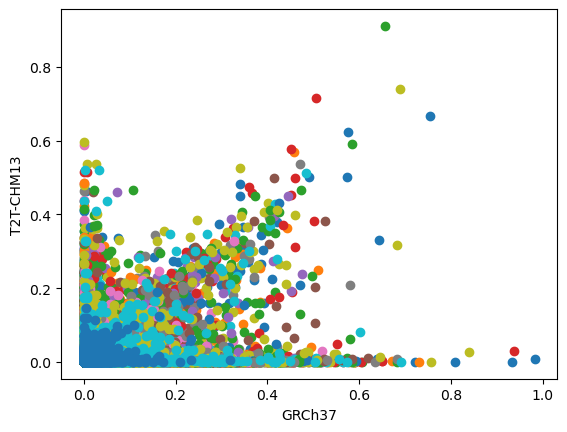

In [95]:
for i in range(21):
    #plt.figure() added for different figures
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    plt.xlabel("GRCh37")
    plt.ylabel("T2T-CHM13")

In [92]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
PearsonRResult(statistic=0.323451767441874, pvalue=5.860357109087662e-190)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.2369305080998528, pvalue=2.9035006889794203e-100)
Africa-EastAsia
PearsonRResult(statistic=0.3063983789203759, pvalue=1.1047922844900546e-169)
Africa-Oceania
PearsonRResult(statistic=0.30091116701758475, pvalue=1.929819552379048e-163)
Africa-SouthAsia
PearsonRResult(statistic=0.29178135382177245, pvalue=2.36440018388543e-153)
Africa-WestEurasia
PearsonRResult(statistic=0.30532425645963723, pvalue=1.8874218010072987e-168)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.12022336583966138, pvalue=1.3986393370995714e-26)
America-EastAsia
PearsonRResult(statistic=0.25159217720164123, pvalue=3.163079115845445e-113)
America-Oceania
PearsonRResult(statistic=0.29619519432600705, pvalue=3.4890357311169765e-158)
America-SouthAsia
PearsonRResult(statistic=0.23256454700056178, pvalue=1.4295326359345662e-96)
America-WestEurasia
PearsonRResult(statistic=

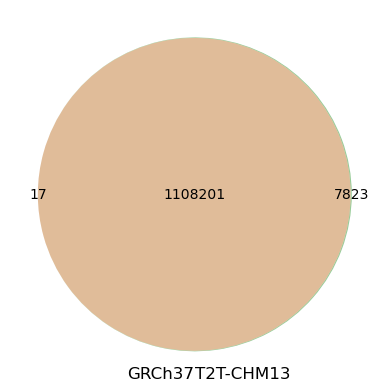

In [104]:
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (17,7823, 1108201), set_labels = ('GRCh37', 'T2T-CHM13'))
plt.show()

In [99]:
t2t_all

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,260453,261566,duplication,0.20250,0.00826,0.08376,0.51576,0.00002,0.00647,...,0.04714,0.46687,0.01258,0.02037,0.32429,0.09181,0.11354,0.53687,0.51986,0.00809
1,chr1,261566,263205,duplication,0.24029,0.01503,0.07117,0.55574,0.00274,0.00000,...,0.02009,0.39865,0.00525,0.00772,0.24498,0.04857,0.05455,0.49563,0.39749,0.00133
2,chr1,263205,264505,duplication,0.02285,0.04029,0.05803,0.02651,0.02509,0.00032,...,0.00038,0.00269,0.00282,0.02774,0.00568,0.00630,0.04462,0.00001,0.01531,0.01705
3,chr1,264505,269912,duplication,0.00224,0.00139,0.00142,0.00294,0.00845,0.00018,...,0.00000,0.00000,0.00157,0.00022,0.00000,0.00159,0.00028,0.00333,0.00026,0.00251
4,chr1,269912,271404,duplication,0.01522,0.05149,0.04796,0.00577,0.07768,0.00970,...,0.00047,0.03834,0.00358,0.01881,0.02597,0.00676,0.01678,0.05647,0.00051,0.03922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116019,chr22,51289688,51291273,duplication,0.00456,0.00983,0.00002,0.00890,0.01188,0.01914,...,0.00167,0.00000,0.00000,0.00383,0.00151,0.00204,0.00602,0.00000,0.00340,0.00484
1116020,chr22,51291273,51292827,duplication,0.00456,0.01401,0.00777,0.00890,0.01188,0.00048,...,0.02240,0.03549,0.04468,0.01029,0.00151,0.00204,0.00361,0.00000,0.00067,0.00096
1116021,chr22,51292827,51295018,duplication,0.03417,0.04602,0.00212,0.00000,0.01383,0.00338,...,0.00660,0.03549,0.01258,0.00537,0.00151,0.00006,0.00008,0.01009,0.00226,0.00001
1116022,chr22,51295018,51296018,deletion,0.00000,0.00000,0.01072,0.00000,0.00000,0.00000,...,0.00845,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000


In [79]:
# Using liftover with 0.95 of min map 

T2T = [10759,454]
GRCH37 = [376, 3]
input_chi = pd.DataFrame([T2T, GRCH37])
input_chi.columns = ['T2T_to_GRCh37', 'GRCh37_to_T2T']
input_chi.index = ['Converted', 'No converted']
input_chi

,T2T_to_GRCh37,GRCh37_to_T2T
Converted,10759,454
No converted,376,3


In [80]:
# Using liftover with 0.95 of min map 

T2T = [10791,454]
GRCH37 = [344, 3]
input_chi = pd.DataFrame([T2T, GRCH37])
input_chi.columns = ['T2T_to_GRCh37', 'GRCh37_to_T2T']
input_chi.index = ['Converted', 'No converted']
input_chi

,T2T_to_GRCh37,GRCh37_to_T2T
Converted,10791,454
No converted,344,3


In [81]:
stats.chi2_contingency(input_chi)

Chi2ContingencyResult(statistic=8.12977555785711, pvalue=0.0043544137146147984, dof=1, expected_freq=array([[10801.68003796,   443.31996204],
       [  333.31996204,    13.68003796]]))

In [82]:
#### GRCh37 to T2T
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(275)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,duplication,0
4965,chr10,104419465,104419465,chr10:105291902-105291901,1,104405478,104428360,deletion,0
4964,chr10,104045086,104045086,chr10:104918602-104918601,1,104041123,104053717,deletion,0
4963,chr10,103049024,103049024,chr10:103923802-103923801,1,103048190,103053290,duplication,0
4962,chr10,102795847,102795847,chr10:103670602-103670601,1,102792850,102799988,deletion,0
...,...,...,...,...,...,...,...,...,...
4669,chr9,124346678,124346678,chr9:114937802-114937801,1,124346052,124347147,deletion,0
4668,chr9,123860978,123860978,chr9:114451902-114451901,1,123859309,123862739,deletion,0
4667,chr9,122859908,122859908,chr9:113452202-113452201,1,122856695,122862982,deletion,0
4666,chr9,122592416,122592416,chr9:113185102-113185101,1,122585236,122595434,duplication,0


In [83]:
grch37_to_t2tchm13 = t2t.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(336)

,Chromosome,Start,End,Type,Start_b,End_b,Original,Strain,Distance
0,chr1,385084,387761,duplication,385106,385106,chr1:891702-891701,1,0
1040770,chr20,58205549,58207892,deletion,58207336,58207336,chr20:55004902-55004901,1,0
1040771,chr20,58813157,58818962,deletion,58817253,58817253,chr20:55614402-55614401,1,0
1040772,chr20,59848578,59849578,deletion,59849556,59849556,chr20:56645402-56645401,1,0
1040773,chr20,59848578,59849578,duplication,59849556,59849556,chr20:56645402-56645401,1,0
...,...,...,...,...,...,...,...,...,...
82273,chr2,155300365,155303159,deletion,155301707,155301707,chr2:155705202-155705201,1,0
82274,chr2,155319899,155328669,duplication,155323413,155323413,chr2:155726902-155726901,1,0
82275,chr2,155332520,155344350,deletion,155339213,155339213,chr2:155742702-155742701,1,0
82294,chr2,163656837,163659351,deletion,163658204,163658204,chr2:164057402-164057401,1,0


In [84]:
grch37_to_t2tchm13 = t2t_all.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Start_b,End_b,Original,Strain,Distance
0,chr1,385084,387761,duplication,0.06949,0.29305,0.08073,0.02830,0.10490,0.04928,...,0.00145,0.00187,0.04083,0.01295,0.00638,385106,385106,chr1:891702-891701,1,0
1,chr1,502101,503101,deletion,0.00813,0.00134,0.01291,0.00890,0.01188,0.01568,...,0.00000,0.00000,0.00000,0.00000,0.00000,502515,502515,chr1:1007802-1007801,1,0
2,chr1,540598,544980,deletion,0.06195,0.00624,0.05204,0.04041,0.00420,0.02607,...,0.02701,0.00367,0.02013,0.00151,0.00961,542636,542636,chr1:1049402-1049401,1,0
3,chr1,576150,578407,deletion,0.00813,0.00134,0.00298,0.00277,0.02754,0.01568,...,0.01369,0.02783,0.01192,0.03330,0.07150,578336,578336,chr1:1085102-1085101,1,0
4,chr1,729845,731135,deletion,0.01654,0.01996,0.02613,0.01810,0.00008,0.00028,...,0.02924,0.01645,0.02052,0.01042,0.00063,730467,730467,chr1:1234302-1234301,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115960,chr22,51202141,51208869,deletion,0.00000,0.00000,0.01072,0.00000,0.01383,0.00000,...,0.00138,0.01379,0.01009,0.00000,0.01738,51201464,51201464,chr22:51126602-51126601,1,678
1115995,chr22,51242213,51243861,deletion,0.01654,0.01996,0.00007,0.00014,0.00008,0.00028,...,0.00024,0.00003,0.00042,0.00001,0.00063,51245253,51245253,chr22:51170102-51170101,1,1393
1115996,chr22,51245263,51246263,deletion,0.00000,0.00000,0.01072,0.00000,0.00000,0.01026,...,0.01030,0.00131,0.00000,0.00687,0.00977,51245253,51245253,chr22:51170102-51170101,1,11
1115997,chr22,51245263,51246263,duplication,0.00000,0.00000,0.02169,0.00000,0.00000,0.00508,...,0.02085,0.00885,0.00000,0.00340,0.00484,51245253,51245253,chr22:51170102-51170101,1,11


<h1> Confusion matrix
<h4>Confusion matrix of litfovers (True positives and True Negatives; both assemblies, False positive to T2TCHM13, False negative to T2TCHM13)
 


In [44]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t = PyRanges(grch37_to_t2t)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep=',', names=header_2)
grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('cnvs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t_all = PyRanges(t2t_all)
t2t_all

t2t_all_values= pd.read_csv('../data/vst_results_t2tchm13.csv')
#t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('../data/vst_results_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)
grch37_all_values

,Chromosome,Start,End,Type,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,deletion,0.00113,0.00296,0.01980,0.04847,0.00462,0.00031,...,0.03052,0.05891,0.01228,0.00365,0.01144,0.00441,0.01162,0.02469,0.03157,0.00185
1,chr1,449901,449901,deletion,0.00000,0.00000,0.01075,0.02736,0.02786,0.00508,...,0.00815,0.02250,0.02163,0.00365,0.00322,0.00636,0.00098,0.00048,0.00733,0.01248
2,chr1,665601,665601,deletion,0.00047,0.04104,0.00301,0.00687,0.00005,0.00067,...,0.06225,0.10623,0.05403,0.04467,0.00078,0.00252,0.00092,0.00684,0.00302,0.00038
3,chr1,665601,665601,duplication,-0.00000,0.01779,0.00002,0.00008,0.02189,0.02900,...,0.01653,0.02250,0.00000,0.00000,0.00002,0.02043,0.02727,0.02621,0.03179,0.00000
4,chr1,891701,891701,deletion,0.00164,0.00012,0.00004,0.00077,0.03324,0.00084,...,0.00029,0.00030,0.04514,0.00140,0.00111,0.03102,0.00054,0.05328,0.00276,0.01934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,chr9,140136301,140136301,deletion,0.01402,0.00007,0.02165,0.00041,0.03190,0.00900,...,0.01586,0.00014,0.02431,0.00589,0.01292,0.00091,0.00216,0.02050,0.00433,0.00571
7836,chr9,140197201,140197201,deletion,0.00769,0.00877,0.00001,0.00814,0.01081,0.01437,...,0.00815,0.00000,0.00000,0.00000,0.00756,0.01009,0.01352,0.00000,0.00000,0.00000
7837,chr9,140245301,140245301,deletion,0.15589,0.12055,0.28916,0.16862,0.20593,0.17624,...,0.05315,0.01008,0.01293,0.00205,0.01708,0.01357,0.02560,0.00013,0.00197,0.00365
7838,chr9,140387601,140387601,deletion,0.00062,0.02499,0.03329,0.02323,0.03069,0.01955,...,0.00000,0.00000,0.00000,0.00737,0.00000,0.00000,0.01054,0.00000,0.00676,0.00950


In [45]:
#### GRCh37 vst to T2T vst 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()


#grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13.sort_values(by=['Distance']).head(50)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0
296,chr11,58812122,58812122,chr11:58630102-58630101,1,58808161,58815232,duplication,0
295,chr11,55536082,55536082,chr11:55365302-55365301,1,55527643,55538953,deletion,0
294,chr11,47188221,47188221,chr11:47052902-47052901,1,47185645,47189271,deletion,0
293,chr11,31503591,31503591,chr11:31389302-31389301,1,31501452,31504577,duplication,0
292,chr11,29116310,29116310,chr11:28997202-28997201,1,29109394,29120621,deletion,0
291,chr11,26724595,26724595,chr11:26605502-26605501,1,26723626,26724626,duplication,0
290,chr11,26578443,26578443,chr11:26459102-26459101,1,26571793,26582617,deletion,0
289,chr11,25869396,25869396,chr11:25750502-25750501,1,25856649,25872120,deletion,0
288,chr11,24347508,24347508,chr11:24244802-24244801,1,24335743,24350825,deletion,0


In [46]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

In [47]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on='End_old', right_on='End')
vst_t2t = grch37_to_t2tchm13.merge(t2t_all_values, left_on=['Chromosome','Start_b','End_b'], right_on=['Chromosome','Start','End'])
vst_t2t

,Chromosome,Start_x,End_x,Original,Strain,Start_b,End_b,Type_x,Distance,Chromosome_old,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0,chr1,...,0.20833,0.16226,0.19753,0.23443,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,9327347,9329877,deletion,0,chr1,...,-0.00000,0.01544,0.00997,0.02872,0.01273,0.01072,0.02922,0.04083,0.00148,0.07366
2,chr1,15268652,15268652,chr1:16150402-16150401,1,15262571,15273032,deletion,0,chr1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,chr1,23888826,23888826,chr1:24377602-24377601,1,23884149,23889404,deletion,0,chr1,...,0.07500,0.06592,0.00668,0.01458,0.00000,0.03668,0.01803,0.03027,0.01295,0.00208
4,chr1,61526516,61526516,chr1:62113302-62113301,1,61525294,61528369,deletion,0,chr1,...,0.01987,0.00161,0.04440,0.00331,0.03219,0.00487,0.00562,0.06277,0.00850,0.01731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,chr22,39367662,39367662,chr22:39293302-39293301,1,39360647,39368645,deletion,0,chr22,...,0.00845,0.00000,0.01110,0.00000,0.00763,0.00138,0.01379,0.01009,0.00000,0.01738
535,chr22,45005436,45005436,chr22:44917502-44917501,1,45002433,45008343,deletion,0,chr22,...,0.01135,0.00877,0.00836,0.00521,0.00091,0.00097,0.00164,0.00000,0.00005,0.00009
536,chr22,45643209,45643209,chr22:45554602-45554601,1,45642081,45644771,deletion,0,chr22,...,0.06308,0.05437,0.00094,0.04836,0.13517,0.05844,0.19557,0.05404,0.00340,0.06073
537,chr22,49638819,49638819,chr22:49530202-49530201,1,49637546,49639487,deletion,0,chr22,...,0.00845,0.00000,0.00000,0.00000,0.00763,0.01030,0.01379,0.00000,0.00000,0.00000
